In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../')
import utils_auto 

# Configuration

In [3]:
trial_idx=2
paper='1106.6060'

# Code-generation prompts

In [4]:
prompt=(utils_auto.generate_prompt(template='prompt.md',docstring='docstring.md',paper=paper,save=True,trial_idx=trial_idx))

In [5]:
print(prompt)

You are a condensed matter physicist working on the numerical calculation for the Hamiltonian of a system using the Hartree Fock method. I will provide you with the physical Hamitonian written in second quantized form as an equation in LaTeX. You should convert it into a class for the HartreeFockHamiltonian using Python and necessary packages, such as numpy and scipy.
This is a multiple-step problem, and you will execute this process by analyzing the equation and answering smaller questions sequentially in order to finally generate the class. The class has the following structure:

CLASS DOCSTRING: 
```
class HartreeFockHamiltonian:
  def __init__(self, N_shell, parameters:dict[str, Any], filling_factor: float=0.5):
    self.lattice = 'square' | 'triangular'
    self.D = # LLM Task: has to define this tuple.
    self.basis_order = {'0': 'flavor_type_0', '1': 'flavor_type_1', ... 'D-1': 'flavor_type_D-1'}
    # this is the basis order that the Hamiltonian will follow

    # Occupancy re

# LLM-Generated code

In [6]:
generated_code = utils_auto.code_generate(prompt,max_tokens=25600,budget_tokens=12800,)


#################### THINKING ####################

Let me approach this step by step to understand and transform the provided Hamiltonian into a Python class.

First, let's analyze the Hamiltonian to identify its structure, the flavors, and the basis order.

The Hamiltonian seems to describe a three-orbital system with orbitals labeled as $p_x$, $p_y$, and $d$. We also have spin $s$, which is likely spin-up or spin-down.

Let me extract the information required for each question:

### QUESTION 1: Dimension and Basis Order

From the Hamiltonian:
- $\hat{C}^{\dag}_{\kk s} = (\hat{p}^{\dag}_{x\kk s}, \hat{p}^{\dag}_{y\kk s}, \hat{d}^{\dag}_{\kk s})$

This indicates we have three orbitals ($p_x$, $p_y$, and $d$) and two spin states (up and down). The k vector represents momentum in the Brillouin zone.

So our tuple of flavors D should be (2, 3) for (spin, orbital).

Basis Order:
0: spin. Order: spin_up (0), spin_down (1)
1: orbital. Order: p_x (0), p_y (1), d (2)

### QUESTION 2: Identif

In [7]:
print(generated_code['thinking'])

Let me approach this step by step to understand and transform the provided Hamiltonian into a Python class.

First, let's analyze the Hamiltonian to identify its structure, the flavors, and the basis order.

The Hamiltonian seems to describe a three-orbital system with orbitals labeled as $p_x$, $p_y$, and $d$. We also have spin $s$, which is likely spin-up or spin-down.

Let me extract the information required for each question:

### QUESTION 1: Dimension and Basis Order

From the Hamiltonian:
- $\hat{C}^{\dag}_{\kk s} = (\hat{p}^{\dag}_{x\kk s}, \hat{p}^{\dag}_{y\kk s}, \hat{d}^{\dag}_{\kk s})$

This indicates we have three orbitals ($p_x$, $p_y$, and $d$) and two spin states (up and down). The k vector represents momentum in the Brillouin zone.

So our tuple of flavors D should be (2, 3) for (spin, orbital).

Basis Order:
0: spin. Order: spin_up (0), spin_down (1)
1: orbital. Order: p_x (0), p_y (1), d (2)

### QUESTION 2: Identifying Interacting Terms

Now let's identify the intera

In [8]:
print(generated_code['text'])

# Analyzing Three-Orbital Model Hamiltonian with Nematic Order

## QUESTION 1: Dimension and Basis Order

Tuple of Flavors (D) = (2, 3)
Basis Order:
0: spin. Order: spin_up (0), spin_down (1)
1: orbital. Order: p_x (0), p_y (1), d (2)

## QUESTION 2: Identifying Interacting Terms

EXP-VAL DEPENDENT TERMS:
```
"n^p": "exp_val[0, 0, :].mean() + exp_val[1, 0, :].mean() + exp_val[0, 1, :].mean() + exp_val[1, 1, :].mean()",
"n": "n^p + exp_val[0, 2, :].mean() + exp_val[1, 2, :].mean()",
"η": "exp_val[0, 0, :].mean() + exp_val[1, 0, :].mean() - exp_val[0, 1, :].mean() - exp_val[1, 1, :].mean()"
```

TERMS:
- γ₁(kₓ) = -2t_{pd}cos(kₓ/2) -> H[0, 2, k] and H[2, 0, k], NI
- γ₁(ky) = -2t_{pd}cos(ky/2) -> H[1, 2, k] and H[2, 1, k], NI
- γ₂(k) = -4t_{pp}cos(kₓ/2)cos(ky/2) -> H[0, 1, k] and H[1, 0, k], NI
- ξₓ = Δ + Ũₚ·n^p/4 - Ṽₚₚ·η/4 - μ -> H[0, 0, k], I
- ξy = Δ + Ũₚ·n^p/4 + Ṽₚₚ·η/4 - μ -> H[1, 1, k], I
- ξd = Ũd·(n-n^p)/2 - μ -> H[2, 2, k], I
- f(n^p, η) = -Ũₚ·(n^p)²/8 + Ṽₚₚ·η²/8 - Ũd·(n-n^p)²/4 -

In [9]:
code = utils_auto.extract_code(generated_code['text'])

In [10]:
print(code)

import numpy as np
from typing import Any, Dict
from HF import *

class HartreeFockHamiltonian:
    """
    Hartree-Fock Hamiltonian for a three-orbital (p_x, p_y, d) model with nematic order.
    
    This implementation models a square lattice with three orbitals (p_x, p_y, d)
    and includes interactions that can lead to nematic ordering between p_x and p_y orbitals.
    
    Args:
        N_shell (int): Number of shells in the first Brillouin zone.
        parameters (dict): Dictionary containing model parameters.
        filling_factor (float): Filling factor, default is 0.5.
    """
    def __init__(self, N_shell: int, parameters: Dict[str, Any]={}, filling_factor: float=0.5):
        self.lattice = 'square'
        self.D = (2, 3)  # (spin, orbital)
        self.basis_order = {'0': 'spin', '1': 'orbital'}
        # Orbital basis: p_x (0), p_y (1), d (2)
        # Spin basis: up (0), down (1)

        # Occupancy relevant parameters
        self.nu = filling_factor
        self.

In [11]:
utils_auto.save_code(code,paper,trial_idx)

Code saved to code_1106_6060_2.py


# Code evaluation

In [12]:
code_path = 'code_{int}_{decimal}_{trial_idx}'.format(int=paper.split('.')[0],decimal=paper.split('.')[1],trial_idx=trial_idx) 

In [13]:
import importlib

In [14]:
module = importlib.import_module(code_path)

In [15]:
import HF

## Task 1: Check k-space

In [16]:
ham = module.HartreeFockHamiltonian(N_shell=10,)

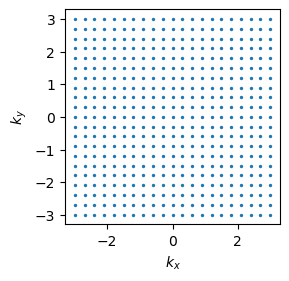

In [17]:
fig1=utils_auto.plot_kspace(kspace=ham.k_space)

## Task 2: Check energy dispersion for non-interacting term

In [18]:
ham = module.HartreeFockHamiltonian(N_shell=10,parameters={'Delta':0,'U_p':0,'U_d':0,'V_pp':0,'V_pd':1e-5,'t_pd':1,'t_pp':1},filling_factor=1/3)


In [19]:
h_nonint = ham.generate_non_interacting()

In [20]:
wf,en= HF.diagonalize(h_nonint) # or HF.diagonalize

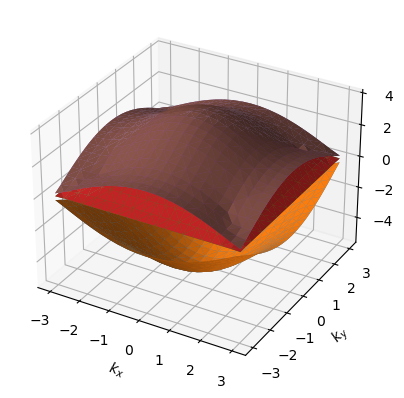

In [21]:
utils_auto.plot_2d_bandstructure(ham,en)

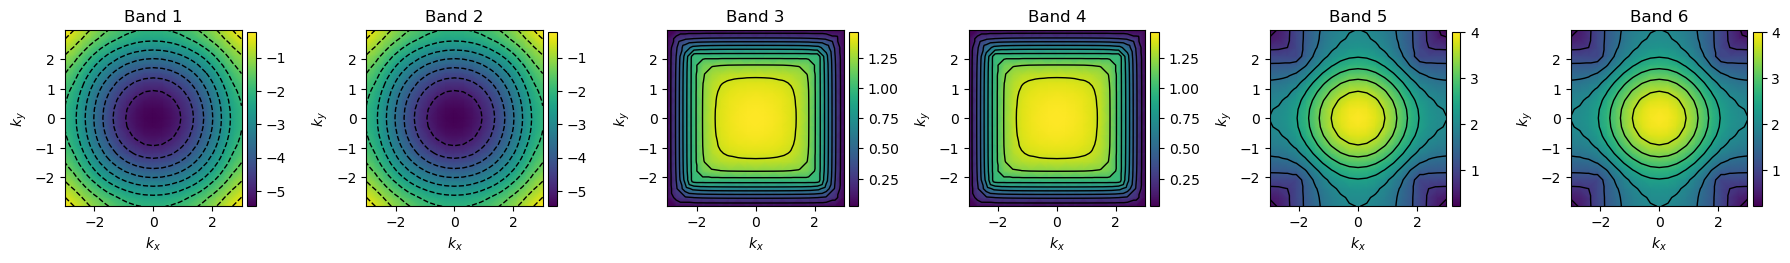

In [22]:
fig2=utils_auto.plot_2d_false_color_map(ham,en)

## Task 3: Infinitesemial U limit

In [23]:
ham_int= module.HartreeFockHamiltonian(N_shell=10,  
parameters={'Delta':5,'U_p':0,'U_d':0,'V_pp':0,'V_pd':1e-5,'t_pd':1,'t_pp':1},filling_factor=1/3)

In [24]:
wf,en= HF.diagonalize(ham_int.generate_non_interacting())
exp_val= HF.get_exp_val(wf,en,1/3,0)
exp_val=HF.unflatten(exp_val,ham_int.D,ham.N_k)

In [25]:
wf_int, en_int, exp_val_int= HF.solve(ham_int,exp_val,100)

Convergence reached at iteration 4


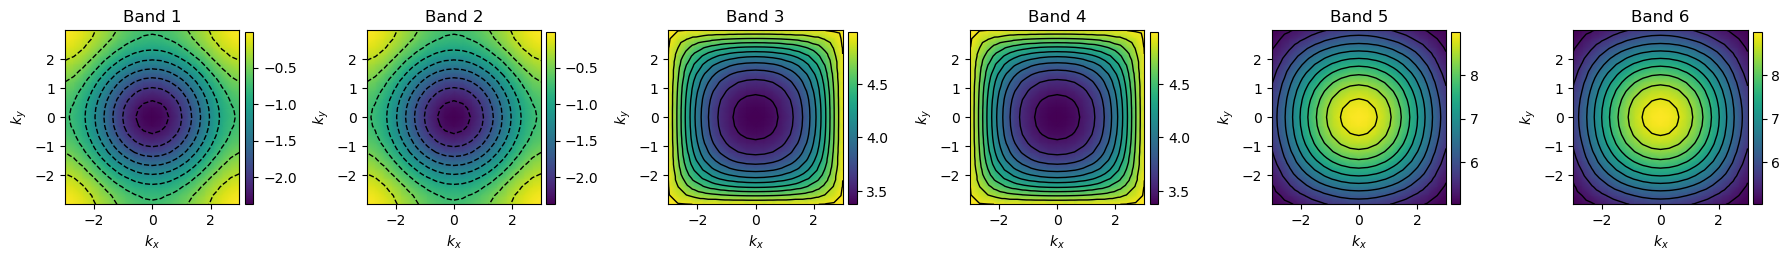

In [26]:
fig3=utils_auto.plot_2d_false_color_map(ham_int,en_int)

## Task 4: Large U limit

In [27]:
ham_int= module.HartreeFockHamiltonian(N_shell=10,  parameters={'Delta':5,'U_p':0,'U_d':0,'V_pp':0,'V_pd':1e5,'t_pd':1,'t_pp':1},filling_factor=1/3)


In [28]:
h_nonint=ham_int.generate_non_interacting()
h_nonint[:,2,:,2,:]-=100
wf,en=HF.diagonalize(h_nonint)
exp_val=HF.get_exp_val(wf,en,1/3,0)
exp_val=HF.unflatten(exp_val,ham_int.D,ham.N_k)

In [29]:
wf_int, en_int, exp_val_int=HF.solve(ham_int,exp_val,99)

Convergence reached at iteration 1


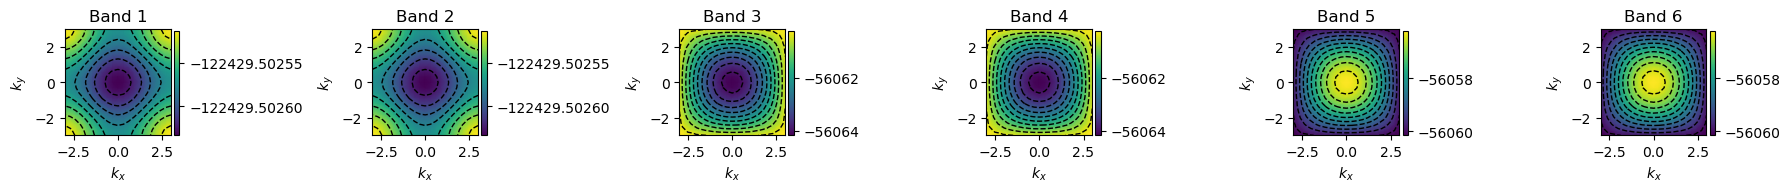

In [30]:
fig4=utils_auto.plot_2d_false_color_map(ham_int,en_int)

In [31]:
utils_auto.print_gap(ham_int,exp_val,en_int,2)

Gap is 66365.32
U/T is 13102.45
mean_U is 13354.34


# Auto eval

## Task 1

In [32]:
result1 = utils_auto.vision_eval(
    fig=fig1, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics1.md', image='image1.md', paper=paper)
    )


#################### THINKING ####################

Let me analyze the image and check it against the rubric.

The image shows a 2D grid of points in what appears to be a momentum space ($k_x$ vs $k_y$). The grid consists of blue dots arranged in a regular pattern that extends from approximately -3 to 3 in both $k_x$ and $k_y$ directions.

The rubric asks me to check:
1. Whether this image shows a momentum space mesh in the first Brillouin zone
2. The point group symmetry of the problem

Let's analyze these points:

1. Momentum space mesh in the first Brillouin zone:
   - The image shows a regular grid of points in momentum space.
   - For a square lattice (as specified in the problem), the first Brillouin zone is a square in reciprocal space.
   - The grid appears to span from approximately -3 to 3 in both $k_x$ and $k_y$, which is larger than the typical first Brillouin zone of a square lattice (which would be from -π to π in both directions, or -1 to 1 if using different units).
  

In [33]:
answer1=utils_auto.extract_result_content(result1['text'])

## Task 2

In [34]:
result2 = utils_auto.vision_eval(
    fig=fig2, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics2.md', image='image2.md', paper=paper)
    )


#################### THINKING ####################

Let me analyze the band structure plots based on the provided rubric:

1. First, identify the shape of the Brillouin zone boundary and confirm it matches what's expected for a square lattice.

Looking at the image, I can see 6 panels labeled as "Band 1" through "Band 6". Each panel shows a square-shaped region with the x-axis labeled as k_x and the y-axis labeled as k_y, both ranging approximately from -3 to 3. The Brillouin zone boundary appears to be square-shaped, which is consistent with what we expect for a square lattice. So this criterion is met.

2. Next, examine the symmetry of the energy distribution shown by the false color plot:

2.1 Identify the highest energy regions (yellow)
- In Bands 1 and 2, the highest energy regions (yellowish-green) are at the corners of the square.
- In Bands 3 and 4, the highest energy regions (yellow) are in a square-shaped region in the center.
- In Bands 5 and 6, the highest energy regions (

In [35]:
answer2=utils_auto.extract_result_content(result2['text'])

## Task 3

In [36]:
result3 = utils_auto.vision_eval(
    fig=fig3, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics3.md', image='image3.md', paper=paper)
    )


#################### THINKING ####################

Let me analyze the image based on the rubric provided for the Hamiltonian of a system using the Hartree-Fock method.

The image shows six panels labeled "Band 1" through "Band 6", each displaying a false color plot of energy (or some other quantity) in k-space (momentum space) with axes kx and ky ranging from approximately -2 to 2.

Going through the rubric:

1. Identify the shape of the Brillouin zone boundary:
   Looking at the plots, I can see that the boundary forms a square shape, which is consistent with what's expected for a square lattice as mentioned in the problem ("LATTICE: square"). So this requirement is met.

2. Examine the symmetry of the energy distribution:

   2.1 Highest energy regions (yellow):
   - Bands 1-2: Yellow regions appear at the corners of the Brillouin zone
   - Bands 3-4: Yellow regions appear at the edges of the Brillouin zone
   - Bands 5-6: Yellow regions appear at the center of the Brillouin zone



In [37]:
answer3=utils_auto.extract_result_content(result3['text'])

## Task 4

In [38]:
result4 = utils_auto.vision_eval(
    fig=fig4, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics4.md', image='image4.md', paper=paper,U_int='4*V_pd = 4e5')
    )


#################### THINKING ####################

I'm being asked to evaluate whether the image shows correct false color plots for the interacting-renormalized band structure in the first Brillouin zone for all bands after self-consistent Hartree-Fock calculation, with specific focus on symmetry and band gap properties.

Let me go through the rubric point by point:

1. **Brillouin zone boundary**
   - The image shows plots with k_x and k_y axes ranging from approximately -2.5 to 2.5, which is consistent with the first Brillouin zone of a square lattice. The square shape of the plotting range matches what's expected for a square lattice.

2. **Symmetry of energy distribution**
   - 2.1 **Highest energy regions (yellow)**:
     - In Bands 1 & 2, the highest energy is at the center (0,0)
     - In Bands 3 & 4, the highest energy is at the center (0,0)
     - In Bands 5 & 6, the highest energy is at the corners
   
   - 2.2 **Pattern of energy variation**:
     - Bands 1 & 2 show conce

In [39]:
answer4=utils_auto.extract_result_content(result4['text'])

In [40]:
utils_auto.save_final_answer(paper,trial_idx,answer1,answer2,answer3,answer4)

Final answer record for '2' saved to final_answer.yaml
